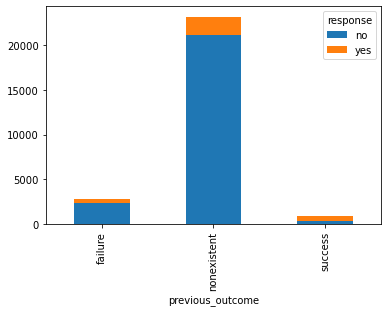

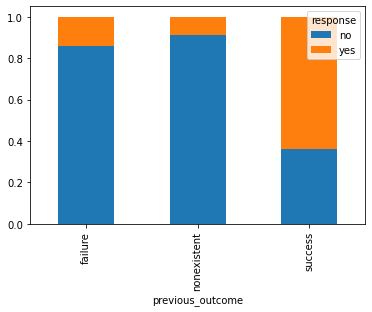

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bank_train = pd.read_csv("C:/Users/jacob/Downloads/DSPR_Data_Sets/Website Data Sets/bank_marketing_training")
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

In [17]:
bank_train.head(n=15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_binned
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,under 27
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,27 to 60


In [12]:
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['previous_outcome'])
round(crosstab_02.div(crosstab_02.sum(0), axis = 1)*100,1)

previous_outcome,failure,nonexistent,success
response,,,
no,86.1,91.2,36.0
yes,13.9,8.8,64.0


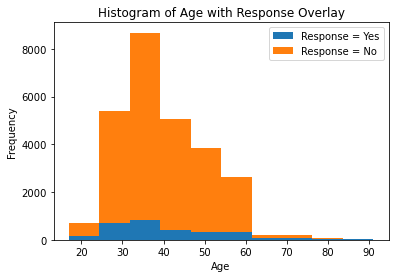

In [13]:
bt_age_y = bank_train[bank_train.response =='yes']['age']
bt_age_n = bank_train[bank_train.response =='no']['age']
plt.hist([bt_age_y, bt_age_n], bins = 10, stacked = True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Histogram of Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

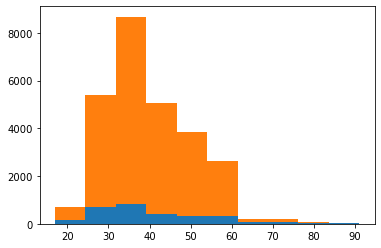

In [14]:
(n, bins, patches) = plt.hist([bt_age_y, bt_age_n], bins = 10, stacked = True)
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

            

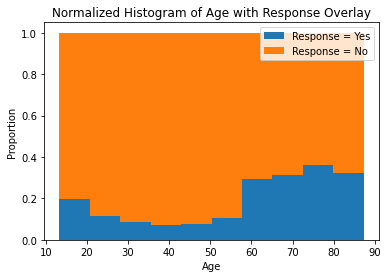

In [15]:
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:,1] - ourbins[:,0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:,1] - ourbins[:,0], bottom = n_norm[:,0])
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); plt.show()

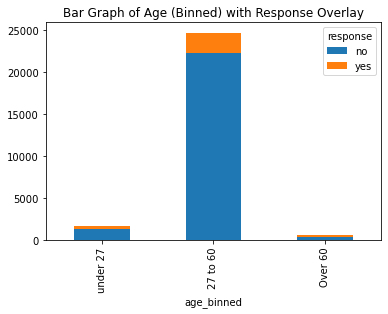

In [16]:
bank_train['age_binned'] = pd.cut(x = bank_train['age'], bins = [0, 27, 60.01, 100], 
                                  labels = ["under 27", "27 to 60", "Over 60"], right = False)
crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_02.plot(kind='bar', stacked = True, title = 'Bar Graph of Age (Binned) with Response Overlay')